### Pybar Analysis
* Of Urban city type, they seem to have the lowest average fares compared to other city types.

* Of the 3 city types, Rural city types have the lowest total fares.

* Of the 3 city types, Urban had the most total amount of rides.

* Of the 3 city types, Urban had the most total drivers.

* Overall, this is a simple case of supply and demand. The more drivers per city, the average cost of a ride goes down. Since there are limited drivers in Rural city types, they tend to charge more. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()

#combine data into a single dataframe by doing a merge outer join so we don't lose any data
combined_city_ride_df = pd.merge(ride_data, city_data, how='outer', on='city')
combined_city_ride_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

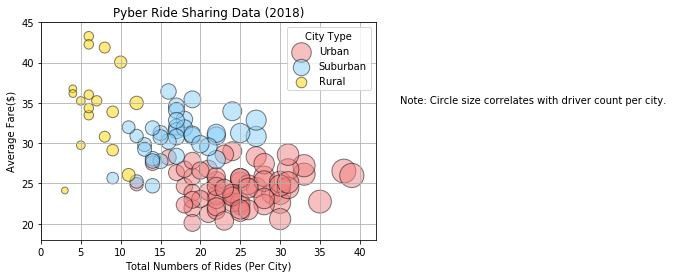

In [2]:
#First filter the data by each city type by doing a loc and create 3 differnet dataframes
urban_data = combined_city_ride_df.loc[combined_city_ride_df["type"] == "Urban", :]

suburban_data = combined_city_ride_df.loc[combined_city_ride_df["type"] == "Suburban", :]

rural_data = combined_city_ride_df.loc[combined_city_ride_df["type"] == "Rural", :] 


#Obtain the x and y coordinates for each of the three city types using their resepective dataframes based on city type
x_urban_rides = urban_data.groupby("city")["ride_id"].count()
y_urban_avgfare = urban_data.groupby("city")["fare"].mean()
s_urban_drivercount = urban_data.groupby("city")["driver_count"].count()

x_suburban_rides = suburban_data.groupby("city")["ride_id"].count()
y_suburban_avgfare = suburban_data.groupby("city")["fare"].mean()
s_suburban_drivercount = suburban_data.groupby("city")["driver_count"].count()

x_rural_rides = rural_data.groupby("city")["ride_id"].count()
y_rural_avgfare = rural_data.groupby("city")["fare"].mean()
s_rural_drivercount = rural_data.groupby("city")["driver_count"].count()


# Build the scatter plots for each city types
plt.scatter(x_urban_rides, y_urban_avgfare, marker="o", facecolors="lightcoral", edgecolors="black", linewidths=1,
            s=s_urban_drivercount*15, alpha=0.5, label="Urban")

plt.scatter(x_suburban_rides, y_suburban_avgfare, marker="o", facecolors="lightskyblue", edgecolors="black", linewidths=1,
            s=s_suburban_drivercount*15, alpha=0.5, label="Suburban")

plt.scatter(x_rural_rides, y_rural_avgfare, marker="o", facecolors="gold", edgecolors="black",linewidths=1,
            s=s_rural_drivercount*15, alpha=0.5, label="Rural")


# Incorporate the other graph properties
#y limit
plt.ylim(18, 45)
#x limit
plt.xlim(0, 42)
#add a grid
plt.grid()
# add a title
plt.title("Pyber Ride Sharing Data (2018)")
# add x label
plt.xlabel("Total Numbers of Rides (Per City)")
# add y label
plt.ylabel("Average Fare($)")


# Create a legend
plt.legend(title="City Type", loc='upper right')


# Incorporate a text label regarding circle size
plt.text(45, 35,"Note: Circle size correlates with driver count per city.")


#Save Figure
plt.savefig("Pyber_Ride_Sharing_Data.png")


#Show figure
plt.show()

## Total Fares by City Type

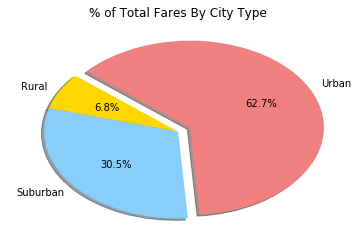

In [3]:
# Calculate Type Percents

#create labels for pie chart and sort A to Z
city_type_labels = combined_city_ride_df["type"].unique()
city_type_labels.sort()


#calculate sum of fares by city type
city_type_fares_sum = combined_city_ride_df.groupby(["type"])["fare"].sum()


# Build Pie Chart
#Colors for chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate a section from the others
explode = (0, 0, 0.1)

#Create the pie chart based on figures above
plt.pie(city_type_fares_sum, explode=explode, labels=city_type_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Create title for pie chart
plt.title("% of Total Fares By City Type")

#Save Figure
plt.savefig("Pyber_Total_Fares_City_Type.png")

#Show Figure
plt.show()

## Total Rides by City Type

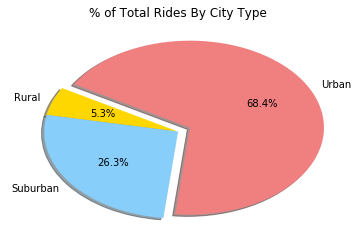

In [4]:
# Calculate Ride Percents

#create labels for pie chart and sort A to Z
city_type_labels = combined_city_ride_df["type"].unique()
city_type_labels.sort()


#calculate total rides by city type
city_type_rides_count = combined_city_ride_df.groupby(["type"])["ride_id"].count()


# Build Pie Chart
#Colors for chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate a section from the others
explode = (0, 0, 0.1)

#Create the pie chart based on figures above
plt.pie(city_type_rides_count, explode=explode, labels=city_type_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

#Create title for pie chart
plt.title("% of Total Rides By City Type")

#Save Figure
plt.savefig("Pyber_Total_Rides_City_Type.png")

#Show Figure
plt.show()


## Total Drivers by City Type

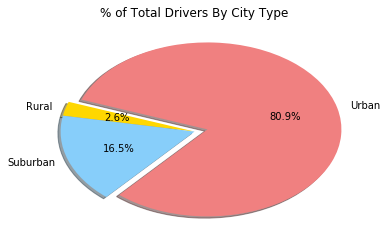

In [5]:
# Calculate Driver Percents

#create labels for pie chart and sort A to Z
city_type_labels = combined_city_ride_df["type"].unique()
city_type_labels.sort()


#calculate total drives by city type
city_type_driver_count = city_data.groupby(["type"])["driver_count"].sum()


# Build Pie Chart
#Colors for chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate a section from the others
explode = (0, 0, 0.1)

#Create the pie chart based on figures above
plt.pie(city_type_driver_count, explode=explode, labels=city_type_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

#Create title for pie chart
plt.title("% of Total Drivers By City Type")

#Save Figure
plt.savefig("Pyber_Total_Drivers_City_Type.png")

#Show Figure
plt.show()
